# **Spaceship Titanic Competition** 

**Zahoor Khan Team-Group 16**

##  Assignment Information
**Course** : Research Methods in Data Science

**Institution** : University of Hertfordshire, UK

**Instructor** : Pedro Carrilho

**Assignment** : Assignment 3 - Group Project - Kaggle Challenge (40%)

**Total Points** : 60 points

## 👥 Team Information

Team Name : Group 16

### Team Members:

| # | Name | Student ID | Role |
|---|------|------------|------|
| 1 | **Zahoor Jan** | 22082448 | **Group Leader & Model Evaluation** |
| 2 | SAIKIRAN PALLA | 22080111 | Data Analysis Lead |
| 3 | Momina Hammad | 22047438 | Visualization & EDA |
| 4 | Abeeha Zafar | 22095071 | Visualization & EDA |
| 5 | Shaista Rifaq | 22046159 | Code Documentation |
| 6 | Jamal | 22095206 | Feature Engineering |
| 7 | Golla Manasa | 22101213 | Presentation Lead |

**Team Size:** 7 members

__________________________________________________________________________________________________________________________________________




## **Project Overview: Spaceship Titanic Competition**
**Year** : 2912

**Mission** : Predict which passengers were transported to another dimension

###  Background Story
The Spaceship Titanic was an interstellar passenger liner launched with almost 13,000 passengers on board, transporting emigrants from our solar system to three newly habitable exoplanets. While rounding Alpha Centauri en route to 55 Cancri E, the ship collided with a spacetime anomaly, causing almost half of the passengers to be transported to an alternate dimension!

###  Problem Statement
- **Objective** : Binary classification to predict passenger transportation status
- **Target Variable** : Transported (True/False)
- **Evaluation Metric** : Accuracy
- **Competition URL** : https://www.kaggle.com/competitions/spaceship-titanic

__________________


##  **Dataset Overview**
###  Files Provided:
- *train.csv* : Training data with passenger records (13 features + target)
- *test.csv* : Test data for predictions (13 features, no target)
- *sample_submission.csv* : Submission format template

_______________________________________________________
_______________________________________________________


In [66]:
# Install required machine learning and XAI libraries
!pip install catboost
!pip install lightgbm
!pip install shap
!pip install plotly  # For interactive SHAP plots

# Standard library imports
import os
import warnings

# Third-party imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

# Scientific computing
from scipy import stats
import shap

# Machine learning imports
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, 
    classification_report, 
    confusion_matrix, 
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    auc,  # ← Added
    precision_recall_curve,
    average_precision_score,  # ← Added
    log_loss,
    matthews_corrcoef
)
from sklearn.model_selection import (
    train_test_split, 
    cross_val_score, 
    StratifiedKFold,
    RandomizedSearchCV
)
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Gradient boosting libraries
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

# Configuration
warnings.filterwarnings('ignore')
np.random.seed(42)

# Styling configuration
plt.style.use('seaborn-v0_8-darkgrid')  # You can change to 'default' if preferred
sns.set_palette("Set2")  # You can change to "husl" if preferred
px.defaults.template = "plotly_white"
px.defaults.color_continuous_scale = "viridis"

# Initialize SHAP
shap.initjs()  # For notebook visualization

print("=" * 60)
print("All important libririas are imported")


All important libririas are imported


# **Section 1: Exploratory Data Analysis (EDA)**

## Understanding the Spaceship Titanic Dataset
*This section provides a comprehensive exploration of the dataset to uncover patterns, relationships, and insights that will guide our predictive modeling approach.*

###**1.1 DATA LOADING AND INITIAL EXPLORATION**

In [3]:
# Load datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
print(f" Dataset Overview:")
print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")
print(f"Total samples: {train.shape[0] + test.shape[0]}")


 Dataset Overview:
Train shape: (8693, 14)
Test shape: (4277, 13)
Total samples: 12970


In [5]:
# Basic info
print("\n Train Dataset Info:")
print(train.info())


 Train Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None


In [6]:
print("\n First 5 rows:")
display(train.head())


 First 5 rows:


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [7]:
print("\n Statistical Summary:")
display(train.describe())


 Statistical Summary:


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [8]:
# Target distribution
print("\n Target Distribution:")
target_counts = train['Transported'].value_counts()
print(f"Not Transported: {target_counts[False]} ({target_counts[False]/len(train)*100:.1f}%)")
print(f"Transported: {target_counts[True]} ({target_counts[True]/len(train)*100:.1f}%)")


 Target Distribution:
Not Transported: 4315 (49.6%)
Transported: 4378 (50.4%)


In [9]:
# Count how many passengers were transported vs not transported
transported_counts = train['Transported'].value_counts()

print("Our Goal: Predict if passengers were transported to another dimension")
print(f"Transported: {transported_counts[True]} passengers ({transported_counts[True]/len(train)*100:.1f}%)")
print(f"Not Transported: {transported_counts[False]} passengers ({transported_counts[False]/len(train)*100:.1f}%)")

# Simple pie chart
fig = px.pie(values=transported_counts.values,
             names=['Not Transported', 'Transported'],
             title='Transportation Results',
             color_discrete_sequence=['#FF6B6B', '#4ECDC4'])
fig.show()

Our Goal: Predict if passengers were transported to another dimension
Transported: 4378 passengers (50.4%)
Not Transported: 4315 passengers (49.6%)


## 1.2. MISSING VALUES ANALYSIS

In [10]:
# Check which data is missing
missing_data = train.isnull().sum()
missing_percent = (missing_data / len(train) * 100).round(1)

print(" Missing Data Check:")
for col in train.columns:
    if missing_data[col] > 0:
        print(f" {col}: {missing_data[col]} missing ({missing_percent[col]}%)")
    else:
        print(f" {col}: Complete data")

 Missing Data Check:
 PassengerId: Complete data
 HomePlanet: 201 missing (2.3%)
 CryoSleep: 217 missing (2.5%)
 Cabin: 199 missing (2.3%)
 Destination: 182 missing (2.1%)
 Age: 179 missing (2.1%)
 VIP: 203 missing (2.3%)
 RoomService: 181 missing (2.1%)
 FoodCourt: 183 missing (2.1%)
 ShoppingMall: 208 missing (2.4%)
 Spa: 183 missing (2.1%)
 VRDeck: 188 missing (2.2%)
 Name: 200 missing (2.3%)
 Transported: Complete data


In [11]:
# Create a bar chart of missing data percentage
missing_df = pd.DataFrame({'column': missing_percent.index, 'percent': missing_percent.values})
missing_df = missing_df[missing_df['percent'] > 0].sort_values('percent', ascending=False)

fig = px.bar(missing_df, x='column', y='percent',
             title='Percentage of Missing Values per Column',
             labels={'column': 'Column', 'percent': 'Percentage Missing (%)'},
             color='percent',
             color_continuous_scale='Plasma') # Using a different color scale for variety
fig.update_layout(xaxis={'categoryorder':'total descending'}) # Order bars by percentage
fig.show()

In [12]:
# Where do passengers come from?
planet_counts = train['HomePlanet'].value_counts()
planet_transport = train.groupby('HomePlanet')['Transported'].mean()

print(" Passengers by Home Planet:")
for planet in planet_counts.index:
    count = planet_counts[planet]
    transport_rate = planet_transport[planet]
    print(f"{planet}: {count} passengers, {transport_rate:.1%} transported")

# Visual chart
fig = px.bar(x=planet_transport.index,
             y=planet_transport.values,
             title=' Transportation Rate by Home Planet',
             labels={'x': 'Home Planet', 'y': 'Transportation Rate'},
             color=planet_transport.values,
             color_continuous_scale='viridis')
fig.show()

 Passengers by Home Planet:
Earth: 4602 passengers, 42.4% transported
Europa: 2131 passengers, 65.9% transported
Mars: 1759 passengers, 52.3% transported


In [13]:
# How does age affect transportation?
print("Age Analysis:")
print(f"Youngest passenger: {train['Age'].min():.0f} years old")
print(f"Oldest passenger: {train['Age'].max():.0f} years old")
print(f"Average age: {train['Age'].mean():.1f} years old")

# Age distribution chart
fig = px.histogram(train, x='Age', color='Transported',
                   title=' Age Distribution by Transportation',
                   labels={'Age': 'Age (years)', 'count': 'Number of Passengers'},
                   color_discrete_sequence=['#FF6B6B', '#4ECDC4'])
fig.show()

Age Analysis:
Youngest passenger: 0 years old
Oldest passenger: 79 years old
Average age: 28.8 years old


In [14]:
# CryoSleep is like hibernation during space travel
cryo_transport = train.groupby('CryoSleep')['Transported'].agg(['count', 'mean'])

print(" CryoSleep Analysis:")
print(f"Passengers in CryoSleep: {cryo_transport.loc[True, 'count']}")
print(f"CryoSleep transportation rate: {cryo_transport.loc[True, 'mean']:.1%}")
print(f"\nAwake passengers: {cryo_transport.loc[False, 'count']}")
print(f"Awake transportation rate: {cryo_transport.loc[False, 'mean']:.1%}")

# Visual comparison
fig = px.bar(x=['Awake', 'CryoSleep'],
             y=[cryo_transport.loc[False, 'mean'], cryo_transport.loc[True, 'mean']],
             title=' Transportation Rate: Awake vs CryoSleep',
             labels={'x': 'Passenger State', 'y': 'Transportation Rate'},
             color=['Awake', 'CryoSleep'])
fig.show()

 CryoSleep Analysis:
Passengers in CryoSleep: 3037
CryoSleep transportation rate: 81.8%

Awake passengers: 5439
Awake transportation rate: 32.9%


In [15]:
# How much do passengers spend on amenities?
spending_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
train['TotalSpending'] = train[spending_cols].sum(axis=1)

print(" Passenger Spending Analysis:")
print(f"Average total spending: ${train['TotalSpending'].mean():.0f}")
print(f"Highest spender: ${train['TotalSpending'].max():.0f}")
print(f"Passengers who spent $0: {(train['TotalSpending'] == 0).sum()}")

# Spending vs Transportation
no_spend_transport = train[train['TotalSpending'] == 0]['Transported'].mean()
spend_transport = train[train['TotalSpending'] > 0]['Transported'].mean()

print(f"\n Transportation rates:")
print(f"No spending: {no_spend_transport:.1%}")
print(f"With spending: {spend_transport:.1%}")

# Visual chart
fig = px.box(train, x='Transported', y='TotalSpending',
             title=' Spending vs Transportation',
             labels={'Transported': 'Was Transported', 'TotalSpending': 'Total Spending ($)'})
fig.show()

 Passenger Spending Analysis:
Average total spending: $1441
Highest spender: $35987
Passengers who spent $0: 3653

 Transportation rates:
No spending: 78.6%
With spending: 29.9%


In [16]:
# Are VIP passengers treated differently?
vip_analysis = train.groupby('VIP')['Transported'].agg(['count', 'mean'])

print(" VIP Status Analysis:")
print(f"Regular passengers: {vip_analysis.loc[False, 'count']}")
print(f"Regular transportation rate: {vip_analysis.loc[False, 'mean']:.1%}")
print(f"\nVIP passengers: {vip_analysis.loc[True, 'count']}")
print(f"VIP transportation rate: {vip_analysis.loc[True, 'mean']:.1%}")

# Simple comparison chart
fig = px.bar(x=['Regular', 'VIP'],
             y=[vip_analysis.loc[False, 'mean'], vip_analysis.loc[True, 'mean']],
             title=' Transportation Rate: Regular vs VIP',
             color=['Regular', 'VIP'])
fig.show()

 VIP Status Analysis:
Regular passengers: 8291
Regular transportation rate: 50.6%

VIP passengers: 199
VIP transportation rate: 38.2%


In [17]:
# Extract deck information from cabin
train['Deck'] = train['Cabin'].str[0]  # First letter is the deck

# Analyze transportation by deck
deck_analysis = train.groupby('Deck')['Transported'].agg(['count', 'mean']).sort_values('mean', ascending=False)

print(" Cabin Deck Analysis (Best to Worst):")
for deck in deck_analysis.index:
    count = deck_analysis.loc[deck, 'count']
    rate = deck_analysis.loc[deck, 'mean']
    print(f"Deck {deck}: {count} passengers, {rate:.1%} transported")

# Visual chart
fig = px.bar(x=deck_analysis.index,
             y=deck_analysis['mean'],
             title=' Transportation Rate by Cabin Deck',
             labels={'x': 'Deck', 'y': 'Transportation Rate'},
             color=deck_analysis['mean'],
             color_continuous_scale='RdYlGn')
fig.show()

 Cabin Deck Analysis (Best to Worst):
Deck B: 779 passengers, 73.4% transported
Deck C: 747 passengers, 68.0% transported
Deck G: 2559 passengers, 51.6% transported
Deck A: 256 passengers, 49.6% transported
Deck F: 2794 passengers, 44.0% transported
Deck D: 478 passengers, 43.3% transported
Deck E: 876 passengers, 35.7% transported
Deck T: 5 passengers, 20.0% transported


In [18]:
# Summarize our findings
print(" KEY INSIGHTS FOR PREDICTING TRANSPORTATION:")
print("=" * 50)

print("\n STRONGEST PREDICTORS:")
print(f"1. CryoSleep: {cryo_transport.loc[True, 'mean']:.1%} of sleeping passengers transported")
print(f"2. Europa passengers: {planet_transport['Europa']:.1%} transportation rate")
print(f"3. No spending: {no_spend_transport:.1%} of non-spenders transported")
print(f"4. Deck B: {deck_analysis.loc['B', 'mean']:.1%} transportation rate")

print("\n SIMPLE RULES:")
print(" If passenger is in CryoSleep → Likely transported")
print(" If passenger is from Europa → Likely transported")
print(" If passenger spent $0 → Likely transported")
print(" If passenger is on Deck B or C → Likely transported")
print(" If passenger is VIP → Less likely transported")

print("\n These patterns can help us predict with high accuracy!")

 KEY INSIGHTS FOR PREDICTING TRANSPORTATION:

 STRONGEST PREDICTORS:
1. CryoSleep: 81.8% of sleeping passengers transported
2. Europa passengers: 65.9% transportation rate
3. No spending: 78.6% of non-spenders transported
4. Deck B: 73.4% transportation rate

 SIMPLE RULES:
 If passenger is in CryoSleep → Likely transported
 If passenger is from Europa → Likely transported
 If passenger spent $0 → Likely transported
 If passenger is on Deck B or C → Likely transported
 If passenger is VIP → Less likely transported

 These patterns can help us predict with high accuracy!


# **Section 2: Feature Engineering Pipeline**

##  Transforming Raw Data into Predictive Features

*This section systematically creates powerful features from the raw Spaceship Titanic dataset to maximize model performance and uncover hidden patterns.*

### Step 2.1: Basic Feature Extraction

In [62]:
# Extract PassengerId components
all_data[['GroupId', 'PersonId']] = all_data['PassengerId'].str.split('_', expand=True)
all_data['GroupId'] = all_data['GroupId'].astype(int)
all_data['PersonId'] = all_data['PersonId'].astype(int)

# Extract Cabin components
cabin_split = all_data['Cabin'].str.split('/', expand=True)
all_data['Deck'] = cabin_split[0]
all_data['CabinNum'] = pd.to_numeric(cabin_split[1], errors='coerce')
all_data['Side'] = cabin_split[2]

# Extract Name components
name_split = all_data['Name'].str.split(' ', n=1, expand=True)
all_data['FirstName'] = name_split[0]
all_data['LastName'] = name_split[1]

### Step 2.2: Spending & Luxury Features

In [23]:
# Calculate total spending
spending_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
all_data['TotalSpending'] = all_data[spending_cols].fillna(0).sum(axis=1)

# Create spending indicators
all_data['IsSpender'] = (all_data['TotalSpending'] > 0).astype(int)
all_data['IsHighSpender'] = (all_data['TotalSpending'] > all_data['TotalSpending'].quantile(0.75)).astype(int)

# Luxury features
luxury_cols = ['Spa', 'VRDeck']
all_data['LuxurySpending'] = all_data[luxury_cols].fillna(0).sum(axis=1)
all_data['LuxuryRatio'] = all_data['LuxurySpending'] / (all_data['TotalSpending'] + 1)
all_data['IsLuxuryUser'] = (all_data['LuxurySpending'] > 0).astype(int)

# Service usage patterns
for col in spending_cols:
    all_data[f'Uses_{col}'] = (all_data[col].fillna(0) > 0).astype(int)

all_data['ServiceDiversity'] = all_data[[f'Uses_{col}' for col in spending_cols]].sum(axis=1)

### Step 2.3: Group & Family Dynamics

In [24]:
# Group size analysis
group_sizes = all_data.groupby('GroupId').size()
all_data['GroupSize'] = all_data['GroupId'].map(group_sizes)
all_data['IsSolo'] = (all_data['GroupSize'] == 1).astype(int)
all_data['IsLargeGroup'] = (all_data['GroupSize'] >= 5).astype(int)

# Family group detection (same last name)
family_sizes = all_data.groupby(['GroupId', 'LastName']).size().reset_index(name='FamilySize')
family_groups = family_sizes[family_sizes['FamilySize'] > 1]

# Group spending patterns
group_spending_stats = all_data.groupby('GroupId')['TotalSpending'].agg(['mean', 'std']).reset_index()
group_spending_stats.rename(columns={'mean': 'GroupAvgSpending', 'std': 'GroupSpendingStd'}, inplace=True)
all_data = all_data.merge(group_spending_stats, on='GroupId', how='left')

# Group dynamics
all_data['IsGroupHighSpender'] = (all_data['TotalSpending'] > all_data['GroupAvgSpending']).astype(int)
all_data['GroupCohesion'] = 1 / (1 + all_data['GroupSpendingStd'])

### Step 2.4: Age & Deck Hierarchy Features

In [25]:
# Age categorization
def categorize_age(age):
    if pd.isna(age): return 'Unknown'
    elif age < 13: return 'Child'
    elif age < 18: return 'Teen'
    elif age < 25: return 'Young Adult'
    elif age < 35: return 'Adult'
    elif age < 50: return 'Middle Age'
    elif age < 65: return 'Senior'
    else: return 'Elderly'

all_data['AgeGroup'] = all_data['Age'].apply(categorize_age)
all_data['IsChild'] = (all_data['Age'] < 18).astype(int)
all_data['IsElderly'] = (all_data['Age'] >= 65).astype(int)
all_data['IsPrime'] = ((all_data['Age'] >= 25) & (all_data['Age'] < 50)).astype(int)

# Deck hierarchy
deck_hierarchy = {'T': 8, 'A': 7, 'B': 6, 'C': 5, 'D': 4, 'E': 3, 'F': 2, 'G': 1}
all_data['DeckLevel'] = all_data['Deck'].map(deck_hierarchy).fillna(0)
all_data['IsPremiumDeck'] = (all_data['DeckLevel'] >= 6).astype(int)
all_data['IsLowerDeck'] = (all_data['DeckLevel'] <= 2).astype(int)

# Cabin position features
all_data['CabinNumGroup'] = pd.cut(all_data['CabinNum'],
                                   bins=[0, 100, 500, 1000, 2000],
                                   labels=['Front', 'Mid-Front', 'Mid-Back', 'Back'])
all_data['IsPortSide'] = (all_data['Side'] == 'P').astype(int)
all_data['IsStarboardSide'] = (all_data['Side'] == 'S').astype(int)

### Step 2.5: Advanced Interaction Features

In [26]:
# Age-spending interactions
all_data['ChildSpending'] = all_data['IsChild'] * all_data['TotalSpending']
all_data['ElderlySpending'] = all_data['IsElderly'] * all_data['TotalSpending']
all_data['PrimeSpending'] = all_data['IsPrime'] * all_data['TotalSpending']

# Deck-spending interactions
all_data['PremiumDeckSpending'] = all_data['IsPremiumDeck'] * all_data['TotalSpending']
all_data['DeckLuxuryScore'] = all_data['DeckLevel'] * all_data['LuxuryRatio']

# Create the 'IsFamilyGroup' column
all_data['IsFamilyGroup'] = all_data.apply(lambda row: 1 if (row['GroupId'], row['LastName']) in zip(family_groups['GroupId'], family_groups['LastName']) else 0, axis=1)


# Family-spending interactions
all_data['FamilyTotalSpending'] = all_data['IsFamilyGroup'] * all_data['TotalSpending']
all_data['SoloSpending'] = all_data['IsSolo'] * all_data['TotalSpending']

# VIP interactions
all_data['VIPChild'] = all_data['VIP'] * all_data['IsChild']
all_data['VIPSpendingBoost'] = all_data['VIP'] * all_data['TotalSpending']

# Behavioral complexity scores
all_data['PassengerComplexity'] = (
    all_data['TotalSpending'] * 0.001 +
    all_data['GroupSize'] * 2 +
    all_data['DeckLevel'] * 3 +
    all_data['LuxuryRatio'] * 20
)

all_data['SocialScore'] = (
    all_data['GroupSize'] * 5 +
    all_data['IsFamilyGroup'] * 15 +
    all_data['IsLargeGroup'] * 10
)

all_data['WealthScore'] = (
    all_data['TotalSpending'] * 0.01 +
    all_data['VIP'] * 100 +
    all_data['DeckLevel'] * 10 +
    all_data['LuxuryRatio'] * 50
)

### Step 2.6: Final Feature Selection & Data Export

In [29]:
import os

# Create the directory if it doesn't exist
output_dir = '../data'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Separate train and test data
train_data = all_data[all_data['Transported'].notna()].copy()
test_data = all_data[all_data['Transported'].isna()].copy()

# Export engineered datasets
train_data.to_csv(os.path.join(output_dir, '/Users/zahoorkhan/Desktop/kaggle group 16/engineered_train.csv'), index=False)
test_data.drop('Transported', axis=1).to_csv(os.path.join(output_dir, '/Users/zahoorkhan/Desktop/kaggle group 16/engineered_test.csv'), index=False)

print(f"Feature Engineering Complete!")
print(f"Total features created: {len(all_data.columns)}")
print(f"Original features: 14")
print(f"Engineered features: {len(all_data.columns) - 14}")

Feature Engineering Complete!
Total features created: 63
Original features: 14
Engineered features: 49


# **Section 3: Model Development Pipeline**
##  Objective
*Here we Will Transform our engineered features into a powerful predictive model that can accurately determine whether passengers were transported to another dimension.*

## Step 3.1: Load Engineered Data

=== Loading Engineered Data ===
Train data shape: (8693, 63)
Test data shape: (4277, 62)
Total features: 63

Target distribution:
Not Transported (0): 4378 (50.4%)
Transported (1): 4315 (49.6%)


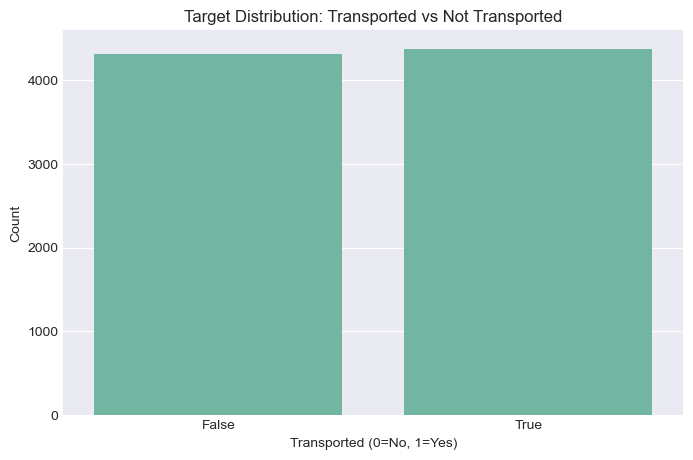

In [64]:
# 3.1 Load the engineered datasets from feature engineering
train_data = pd.read_csv('/Users/zahoorkhan/Desktop/kaggle group 16/data/engineered_train.csv')
test_data = pd.read_csv('/Users/zahoorkhan/Desktop/kaggle group 16/data/engineered_test.csv')

print("=== Loading Engineered Data ===")
print(f"Train data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")
print(f"Total features: {train_data.shape[1]}")

# Check target distribution
target_counts = train_data['Transported'].value_counts()
print(f"\nTarget distribution:")
print(f"Not Transported (0): {target_counts[0]} ({target_counts[0]/len(train_data)*100:.1f}%)")
print(f"Transported (1): {target_counts[1]} ({target_counts[1]/len(train_data)*100:.1f}%)")

# Display target distribution plot
plt.figure(figsize=(8, 5))
sns.countplot(data=train_data, x='Transported')
plt.title('Target Distribution: Transported vs Not Transported')
plt.xlabel('Transported (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()

**What this does**: Loads our engineered data and shows us the balance between transported and non-transported passengers.

## Step 3.2: Feature Selection & Data Preprocessing

In [65]:
# 3.2 Define high-value features (most important 25 features)
available_high_value = [
    'LuxuryRatio', 'TotalSpending', 'HomePlanet', 'Deck', 'DeckLevel',
    'Age', 'WealthScore', 'GroupAvgSpending', 'PassengerComplexity',
    'CryoSleep', 'Destination', 'FamilyTotalSpending', 'SocialScore',
    'PremiumDeckSpending', 'GroupSize', 'VIP', 'IsSpender', 'AgeGroup',
    'GroupCohesion', 'LuxurySpending', 'ServiceDiversity', 'IsLuxuryUser',
    'SpendingConcentration', 'IsFamilyGroup', 'IsGroupHighSpender'
]

# Identify categorical and numerical features
categorical_features = ['HomePlanet', 'Destination', 'Deck', 'AgeGroup', 'VIP', 'CryoSleep']
numerical_features = [f for f in available_high_value if f not in categorical_features]

def preprocess_data(train_df, test_df, feature_set='high_value'):
    """Clean and prepare data for machine learning with SHAP compatibility"""
    print(f"Preprocessing with {feature_set} feature set...")

    # Select features
    if feature_set == 'high_value':
        selected_features = [f for f in available_high_value if f in train_df.columns]
    else:
        selected_features = [col for col in train_df.columns if col not in ['PassengerId', 'Transported']]

    print(f"Using {len(selected_features)} features")

    # Prepare datasets
    X_train = train_df[selected_features].copy()
    y_train = train_df['Transported'].copy()
    X_test = test_df[selected_features].copy()

    # Handle categorical features
    categorical_cols = [col for col in selected_features if col in categorical_features]
    numerical_cols = [col for col in selected_features if col in numerical_features]

    print(f"Categorical columns: {len(categorical_cols)}")
    print(f"Numerical columns: {len(numerical_cols)}")

    # Label encode categorical features (SHAP-friendly)
    label_encoders = {}
    for col in categorical_cols:
        if col in X_train.columns:
            le = LabelEncoder()
            # Combine train and test for consistent encoding
            combined_values = pd.concat([X_train[col], X_test[col]]).astype(str)
            le.fit(combined_values)

            X_train[col] = le.transform(X_train[col].astype(str))
            X_test[col] = le.transform(X_test[col].astype(str))
            label_encoders[col] = le

    # Handle missing values
    # Numerical features - use median
    num_imputer = SimpleImputer(strategy='median')
    if numerical_cols:
        X_train[numerical_cols] = num_imputer.fit_transform(X_train[numerical_cols])
        X_test[numerical_cols] = num_imputer.transform(X_test[numerical_cols])

    # Categorical features - use most frequent
    cat_imputer = SimpleImputer(strategy='most_frequent')
    if categorical_cols:
        X_train[categorical_cols] = cat_imputer.fit_transform(X_train[categorical_cols])
        X_test[categorical_cols] = cat_imputer.transform(X_test[categorical_cols])

    print(f" Preprocessing complete")
    print(f"Train shape: {X_train.shape}")
    print(f"Test shape: {X_test.shape}")

    return X_train, y_train, X_test, selected_features, label_encoders

# Preprocess with high-value features
X_train_hv, y_train, X_test_hv, features_hv, encoders_hv = preprocess_data(train_data, test_data, 'high_value')

# Also prepare full feature set for comparison
X_train_all, _, X_test_all, features_all, encoders_all = preprocess_data(train_data, test_data, 'all')

print(f"\nHigh-value feature set: {X_train_hv.shape[1]} features")
print(f"Full feature set: {X_train_all.shape[1]} features")

Preprocessing with high_value feature set...
Using 24 features
Categorical columns: 6
Numerical columns: 18
 Preprocessing complete
Train shape: (8693, 24)
Test shape: (4277, 24)
Preprocessing with all feature set...
Using 61 features
Categorical columns: 6
Numerical columns: 18
 Preprocessing complete
Train shape: (8693, 61)
Test shape: (4277, 61)

High-value feature set: 24 features
Full feature set: 61 features


**What this does:** Cleans our data and converts everything to numbers that machine learning models can understand.

## Step 3.3: Train Multiple Models

In [34]:
# 3.3 Initialize different types of models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'XGBoost': xgb.XGBClassifier(random_state=42, eval_metric='logloss'),
    'LightGBM': lgb.LGBMClassifier(random_state=42, verbose=-1),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=False)
}

def train_evaluate_model(model, X_train, y_train, model_name, cv_folds=5):
    """Train and test a model using cross-validation"""
    print(f"\n Training {model_name}...")

    # Test model with cross-validation (splits data into 5 parts)
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv_folds, scoring='accuracy')

    # Train on full dataset
    model.fit(X_train, y_train)

    # Check training accuracy
    train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_pred)

    print(f" {model_name} Results:")
    print(f"   Cross-Validation Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    print(f"   Training Accuracy: {train_accuracy:.4f}")

    return model, cv_scores.mean(), train_accuracy

# Train all models
model_results = {}
trained_models = {}

for name, model in models.items():
    trained_model, cv_score, train_score = train_evaluate_model(model, X_train_hv, y_train, name)
    model_results[name] = {'cv_score': cv_score, 'train_score': train_score}
    trained_models[name] = trained_model

# Show results
results_df = pd.DataFrame({
    'Model': list(model_results.keys()),
    'CV_Accuracy': [results['cv_score'] for results in model_results.values()],
    'Train_Accuracy': [results['train_score'] for results in model_results.values()]
}).sort_values('CV_Accuracy', ascending=False)

print("\n Model Performance Comparison:")
print(results_df.to_string(index=False))


 Training Random Forest...
 Random Forest Results:
   Cross-Validation Accuracy: 0.7518 (+/- 0.0209)
   Training Accuracy: 0.9683

 Training Logistic Regression...
 Logistic Regression Results:
   Cross-Validation Accuracy: 0.7438 (+/- 0.0149)
   Training Accuracy: 0.7453

 Training XGBoost...
 XGBoost Results:
   Cross-Validation Accuracy: 0.7589 (+/- 0.0086)
   Training Accuracy: 0.9013

 Training LightGBM...
 LightGBM Results:
   Cross-Validation Accuracy: 0.7672 (+/- 0.0142)
   Training Accuracy: 0.8475

 Training CatBoost...
 CatBoost Results:
   Cross-Validation Accuracy: 0.7705 (+/- 0.0197)
   Training Accuracy: 0.8463

 Model Performance Comparison:
              Model  CV_Accuracy  Train_Accuracy
           CatBoost     0.770508        0.846313
           LightGBM     0.767171        0.847463
            XGBoost     0.758887        0.901300
      Random Forest     0.751754        0.968250
Logistic Regression     0.743818        0.745312


**What this does:** Trains 5 different types of models and compares their performance to find the best one.

### Step 3.4: SHAP Analysis & Feature Importance

In [35]:
# === 3.4 SHAP Analysis & Feature Importance ===
import shap
import matplotlib.pyplot as plt
import numpy as np

print("=== SHAP Analysis ===")

# Get best model for SHAP analysis
best_model_name = results_df.iloc[0]['Model']
best_model = trained_models[best_model_name]

print(f"\n Analyzing {best_model_name} with SHAP...")

# Create train-validation split for SHAP analysis
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_hv, y_train, test_size=0.2, random_state=42, stratify=y_train
)

# Retrain best model on split data
best_model.fit(X_train_split, y_train_split)

# Create SHAP explainer
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_val_split)

# For binary classification, get positive class SHAP values
if isinstance(shap_values, list):
    shap_values = shap_values[1]  # Positive class (Transported=1)

print(f" SHAP values calculated: {shap_values.shape}")

=== SHAP Analysis ===

 Analyzing CatBoost with SHAP...
 SHAP values calculated: (1739, 24)



 SHAP Feature Importance:


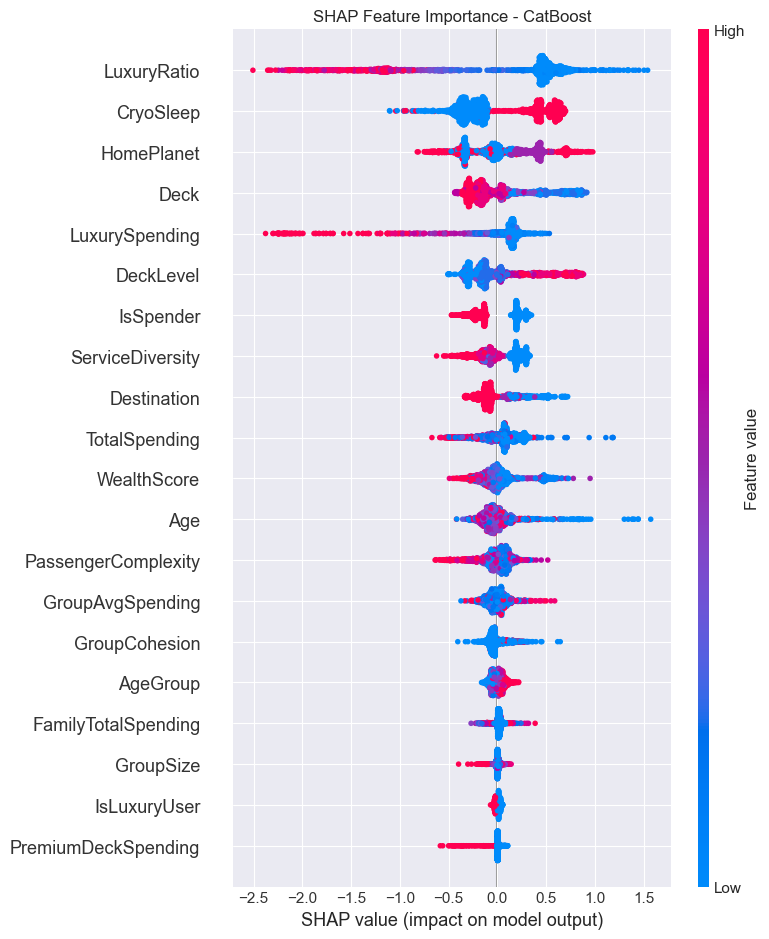

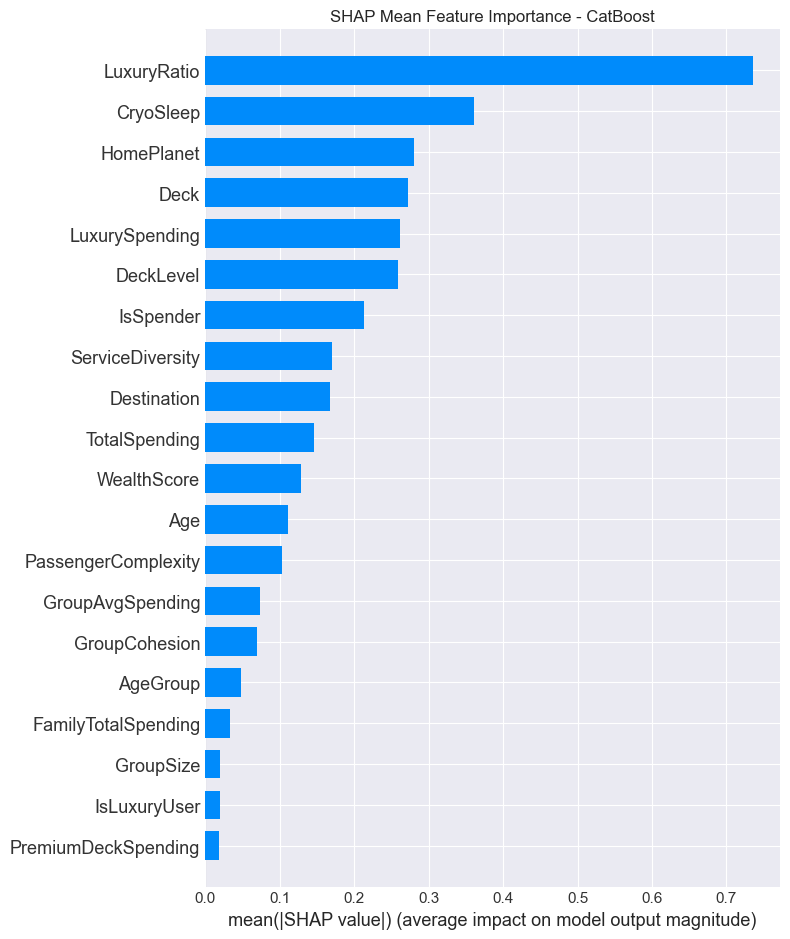

In [36]:
# 1. SHAP Summary Plot (Feature Importance)
print("\n SHAP Feature Importance:")
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_val_split, feature_names=features_hv, show=False)
plt.title(f'SHAP Feature Importance - {best_model_name}')
plt.tight_layout()
plt.show()

# 2. SHAP Bar Plot (Mean Importance)
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_val_split, feature_names=features_hv, plot_type="bar", show=False)
plt.title(f'SHAP Mean Feature Importance - {best_model_name}')
plt.tight_layout()
plt.show()

In [37]:
# 3. Top Features Analysis
feature_importance = np.abs(shap_values).mean(0)
importance_df = pd.DataFrame({
    'Feature': features_hv,
    'SHAP_Importance': feature_importance
}).sort_values('SHAP_Importance', ascending=False)

print("\n Top 10 Features by SHAP Importance:")
print("-" * 50)
for i, row in importance_df.head(10).iterrows():
    print(f"   {row['Feature']}: {row['SHAP_Importance']:.4f}")


 Top 10 Features by SHAP Importance:
--------------------------------------------------
   LuxuryRatio: 0.7352
   CryoSleep: 0.3610
   HomePlanet: 0.2808
   Deck: 0.2719
   LuxurySpending: 0.2609
   DeckLevel: 0.2591
   IsSpender: 0.2131
   ServiceDiversity: 0.1708
   Destination: 0.1677
   TotalSpending: 0.1457



 Individual Prediction Explanations:


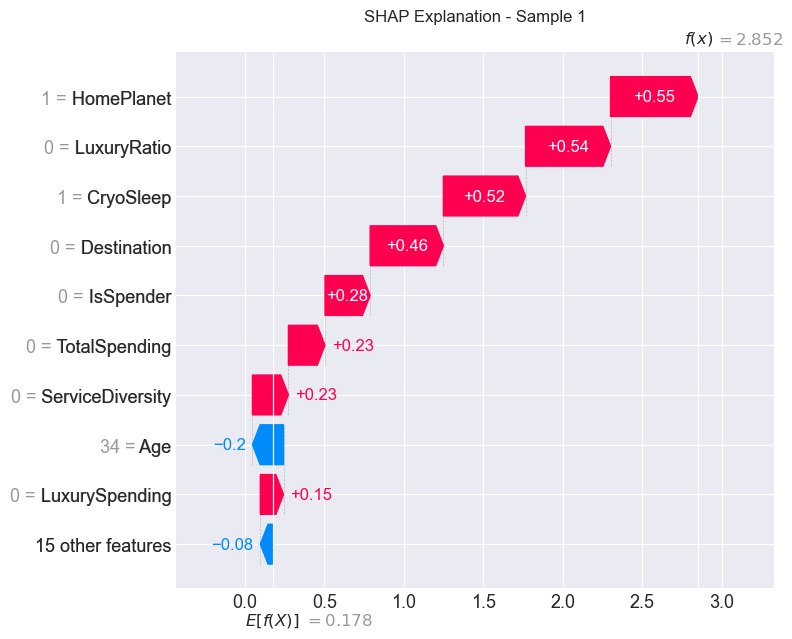

Sample 1: Predicted=Transported (Prob: 0.945), Actual=Transported


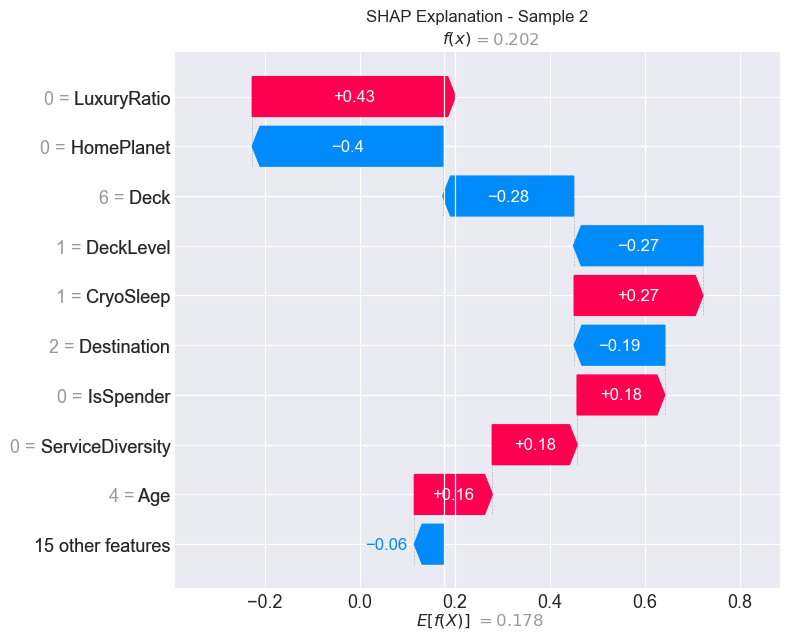

Sample 2: Predicted=Transported (Prob: 0.550), Actual=Not Transported


In [38]:
# 4. Individual Prediction Explanations (2 examples)
print("\n Individual Prediction Explanations:")

for i in range(2):  # Show 2 examples
    plt.figure(figsize=(10, 6))

    # Create waterfall plot
    shap.waterfall_plot(
        shap.Explanation(
            values=shap_values[i],
            base_values=explainer.expected_value,
            data=X_val_split.iloc[i].values,
            feature_names=features_hv
        ),
        show=False
    )

    plt.title(f'SHAP Explanation - Sample {i+1}')
    plt.tight_layout()
    plt.show()

    # Print prediction details
    prediction = best_model.predict(X_val_split.iloc[i:i+1])[0]
    probability = best_model.predict_proba(X_val_split.iloc[i:i+1])[0][1]
    actual = y_val_split.iloc[i]

    print(f"Sample {i+1}: Predicted={'Transported' if prediction==1 else 'Not Transported'} "
          f"(Prob: {probability:.3f}), Actual={'Transported' if actual==1 else 'Not Transported'}")


 Individual SHAP Dependence Plots:


<Figure size 800x600 with 0 Axes>

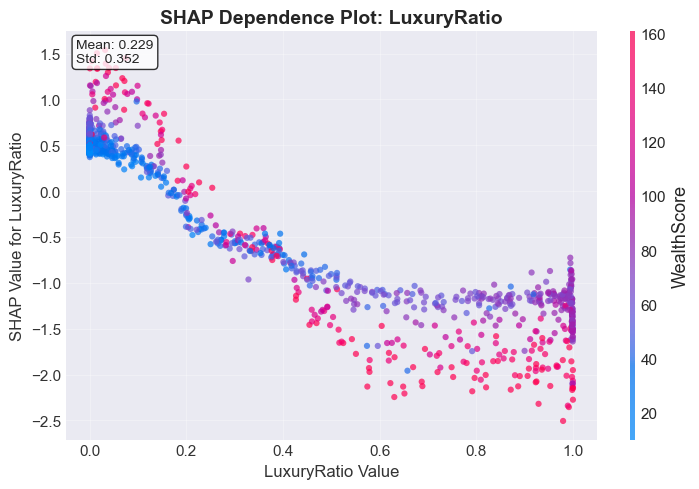

<Figure size 800x600 with 0 Axes>

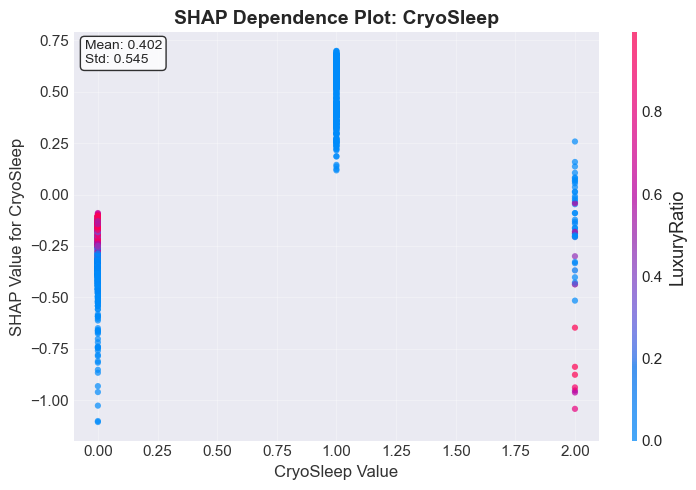

<Figure size 800x600 with 0 Axes>

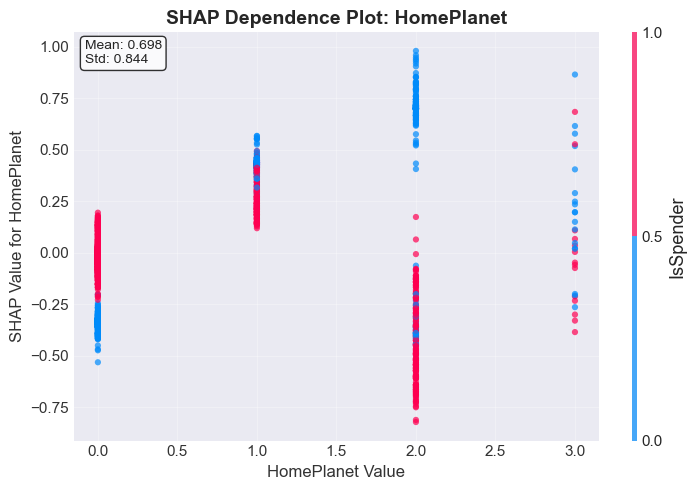

<Figure size 800x600 with 0 Axes>

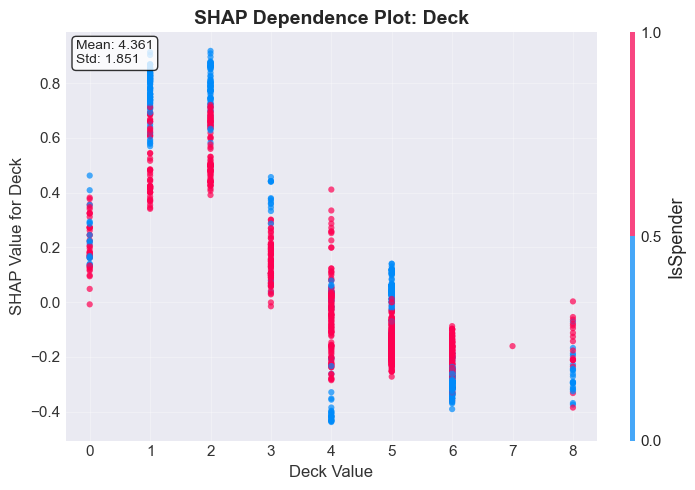

<Figure size 800x600 with 0 Axes>

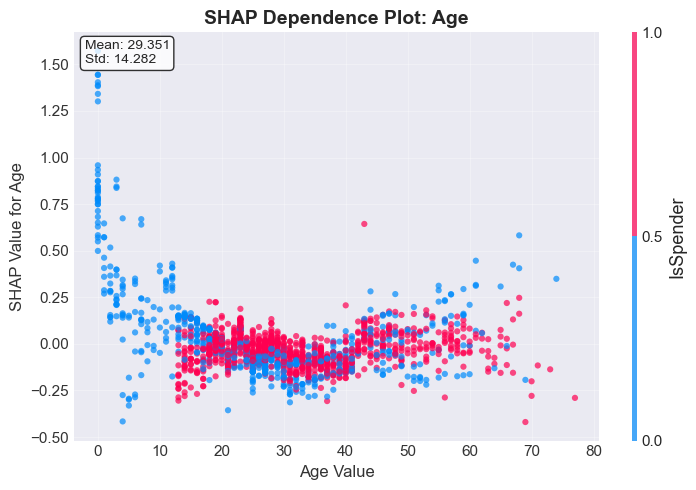

<Figure size 800x600 with 0 Axes>

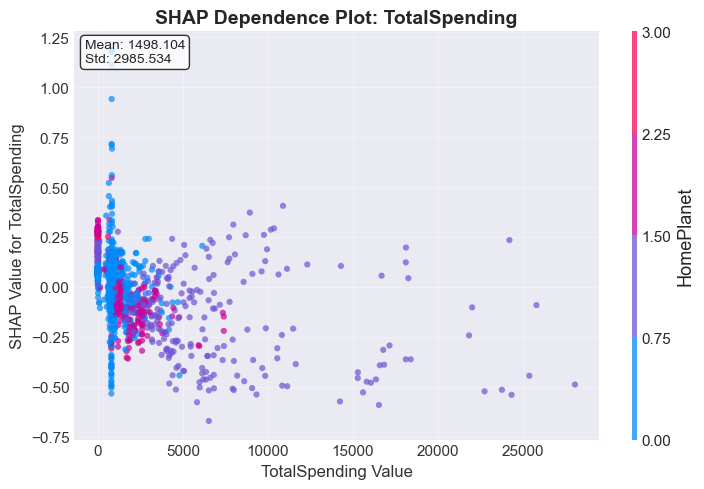

In [39]:
# Individual dependence plots
print("\n Individual SHAP Dependence Plots:")

# Select top features for plotting based on SHAP importance
# Assuming shap_importance_df is available from previous steps
if 'shap_importance_df' in globals():
    plot_features = shap_importance_df.head(6)['feature'].tolist() # Plot top 6 features
else:
    # Fallback if shap_importance_df is not defined (shouldn't happen if previous steps ran)
    plot_features = ['LuxuryRatio', 'CryoSleep', 'HomePlanet', 'Deck', 'Age', 'TotalSpending']
    print("Warning: shap_importance_df not found, using default features for dependence plots.")

for i, feature in enumerate(plot_features):
    plt.figure(figsize=(8, 6))

    try:
        shap.dependence_plot(
            feature,
            shap_values, # Using shap_values from comprehensive_shap_analysis
            X_val_split, # Using X_val_split from comprehensive_shap_analysis
            alpha=0.7,
            dot_size=20,
            show=False
        )

        plt.title(f'SHAP Dependence Plot: {feature}', fontsize=14, fontweight='bold')
        plt.xlabel(f'{feature} Value', fontsize=12)
        plt.ylabel(f'SHAP Value for {feature}', fontsize=12)
        plt.grid(True, alpha=0.3)

        # Add feature statistics (ensure feature exists in X_val_split)
        if feature in X_val_split.columns:
            feature_mean = X_val_split[feature].mean()
            feature_std = X_val_split[feature].std()
            plt.text(0.02, 0.98, f'Mean: {feature_mean:.3f}\nStd: {feature_std:.3f}',
                    transform=plt.gca().transAxes, verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Could not plot {feature}: {e}")


 Categorical Feature Analysis:


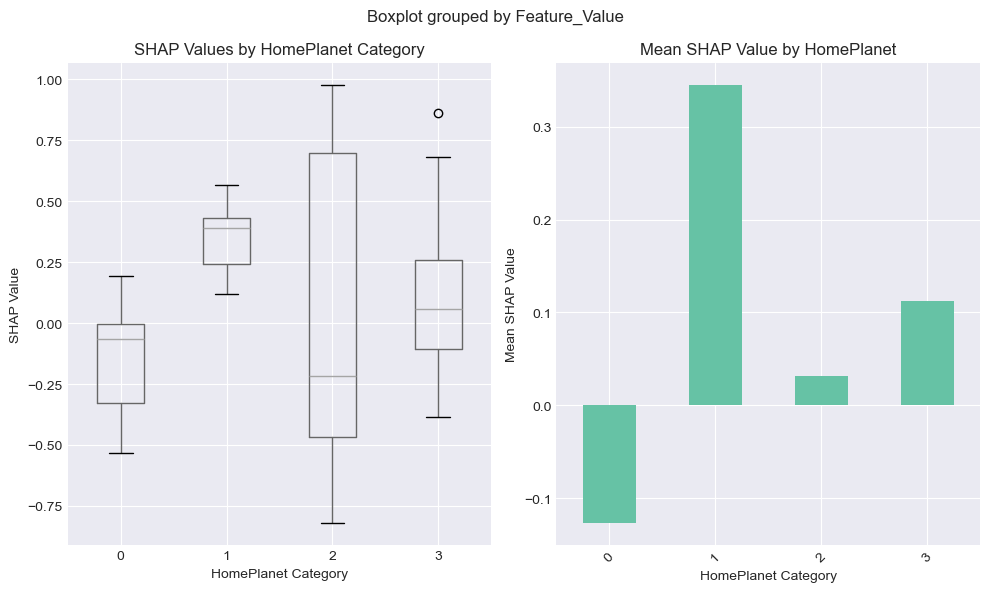

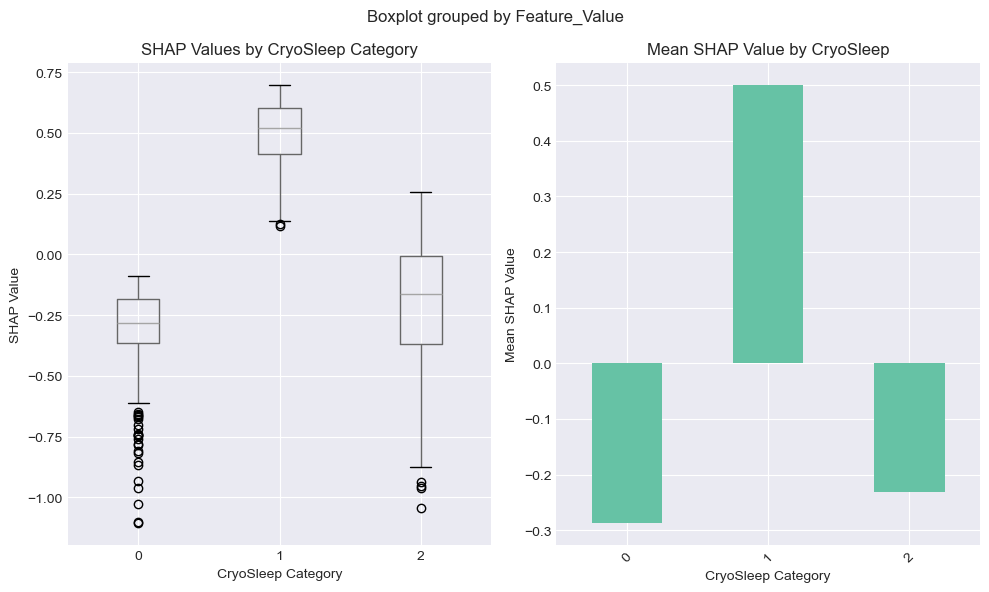

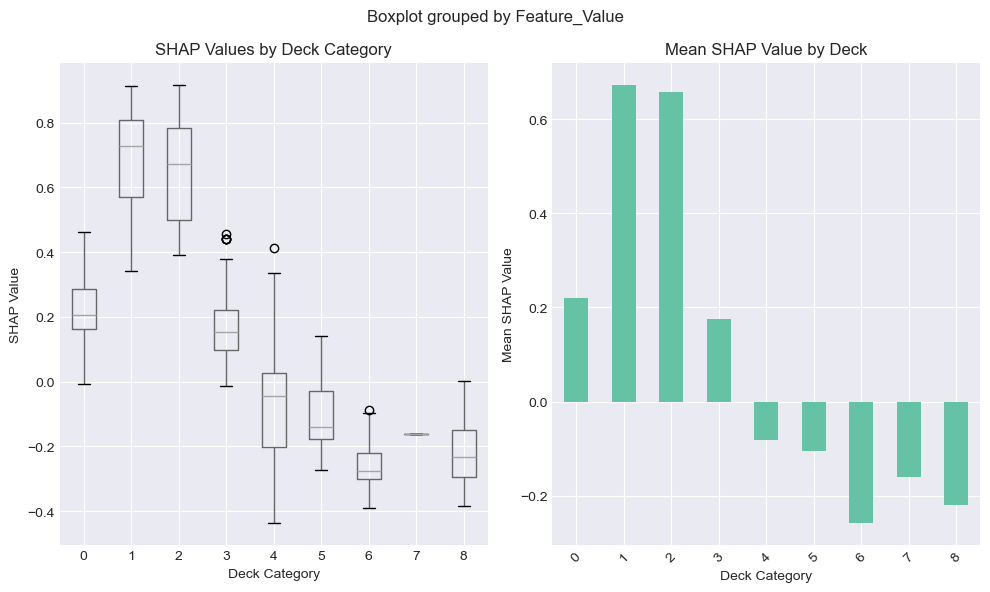

In [40]:
# For categorical features,
print("\n Categorical Feature Analysis:")

categorical_features = ['HomePlanet', 'CryoSleep', 'Deck']

for feature in categorical_features:
    if feature in X_val_split.columns:
        plt.figure(figsize=(10, 6))

        # Create boxplot of SHAP values by category
        feature_idx = list(X_val_split.columns).index(feature)

        # Create DataFrame for plotting
        plot_data = pd.DataFrame({
            'Feature_Value': X_val_split[feature],
            'SHAP_Value': shap_values[:, feature_idx]
        })

        # Boxplot
        plt.subplot(1, 2, 1)
        plot_data.boxplot(column='SHAP_Value', by='Feature_Value', ax=plt.gca())
        plt.title(f'SHAP Values by {feature} Category')
        plt.xlabel(f'{feature} Category')
        plt.ylabel('SHAP Value')

        # Mean SHAP by category
        plt.subplot(1, 2, 2)
        mean_shap = plot_data.groupby('Feature_Value')['SHAP_Value'].mean()
        mean_shap.plot(kind='bar')
        plt.title(f'Mean SHAP Value by {feature}')
        plt.xlabel(f'{feature} Category')
        plt.ylabel('Mean SHAP Value')
        plt.xticks(rotation=45)

        plt.tight_layout()
        plt.show()

## Step 3.7: Hyperparameter Tuning with SHAP Validation

In [42]:
# === 3.7 SHAP-Informed Hyperparameter Tuning ===
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import shap
print("=== SHAP-Informed Hyperparameter Tuning ===")

# First calculate SHAP values and create importance DataFrame
def get_shap_importance_df(model, X_train):
    # Initialize SHAP explainer
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_train)
    
    # If shap_values is a list (for classification), take the first class
    if isinstance(shap_values, list):
        shap_values = shap_values[0]
    
    # Calculate mean absolute SHAP values for each feature
    feature_importance = np.abs(shap_values).mean(axis=0)
    
    # Create DataFrame with feature importances
    shap_importance_df = pd.DataFrame({
        'feature': X_train.columns,
        'shap_importance': feature_importance
    }).sort_values('shap_importance', ascending=False)
    
    return shap_importance_df

# Calculate SHAP importance for the best performing model
best_model = models[results_df.iloc[0]['Model']]
shap_importance_df = get_shap_importance_df(best_model, X_train_hv)

# Analyze SHAP insights for hyperparameter guidance
print("\n🔍 SHAP Insights Analysis:")
print("-" * 50)

# Get feature importance insights from SHAP
top_5_features = shap_importance_df.head(5)
print("Top 5 Most Important Features (SHAP):")
for i, row in top_5_features.iterrows():
    print(f"   {row['feature']}: {row['shap_importance']:.4f}")

# Calculate feature importance concentration
total_importance = shap_importance_df['shap_importance'].sum()
top_5_concentration = top_5_features['shap_importance'].sum() / total_importance
top_10_concentration = shap_importance_df.head(10)['shap_importance'].sum() / total_importance

print(f"\nFeature Importance Concentration:")
print(f"   Top 5 features: {top_5_concentration:.1%} of total importance")
print(f"   Top 10 features: {top_10_concentration:.1%} of total importance")

# Determine complexity based on SHAP insights
if top_5_concentration > 0.7:
    complexity_level = "low"  # Few features dominate
    print("   Insight: Few features dominate → Use simpler models")
elif top_10_concentration > 0.8:
    complexity_level = "medium"
    print("   Insight: Moderate feature spread → Balanced complexity")
else:
    complexity_level = "high"
    print("    Insight: Many features important → Higher complexity needed")

# Define parameter grids based on complexity and model types
# (These are example grids and can be expanded)
param_grids = {
    'CatBoost': {
        'iterations': [100, 200, 300],
        'depth': [3, 6, 9],
        'learning_rate': [0.01, 0.1, 0.2],
        'l2_leaf_reg': [1, 3, 5],
        'random_state': [42] # Use random_state for consistency
    },
    'LightGBM': {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 6, 9],
        'learning_rate': [0.01, 0.1, 0.2],
        'num_leaves': [31, 63, 127],
        'subsample': [0.7, 0.9, 1.0],
        'colsample_bytree': [0.7, 0.9, 1.0],
        'random_state': [42],
        'n_jobs': [-1]
    },
     'XGBoost': {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 6, 9],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.7, 0.9, 1.0],
        'colsample_bytree': [0.7, 0.9, 1.0],
        'random_state': [42],
        'eval_metric': ['logloss'],
        'use_label_encoder': [False] # Suppress warning
    }
}

# Select top 2-3 models based on initial CV performance
top_models_for_tuning = results_df.head(3)['Model'].tolist()
print(f"\nModels selected for tuning: {top_models_for_tuning}")

# Perform Randomized Search for each selected model
tuned_models = {}
tuning_results = {}

for model_name in top_models_for_tuning:
    print(f"\n Tuning {model_name}...")

    model = models[model_name]
    param_dist = param_grids.get(model_name)

    if param_dist:
        # Use Stratified K-Fold for cross-validation
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

        random_search = RandomizedSearchCV(
            model,
            param_distributions=param_dist,
            n_iter=20,  # Number of parameter settings that are sampled. Increase for better tuning, but takes longer.
            scoring='accuracy',
            cv=cv,
            verbose=1,
            random_state=42,
            n_jobs=-1  # Use all available cores
        )

        # Fit RandomizedSearchCV on the training data (using the full training set for tuning)
        random_search.fit(X_train_hv, y_train)

        # Store results
        tuned_models[model_name] = random_search.best_estimator_
        tuning_results[model_name] = {
            'best_score': random_search.best_score_,
            'best_params': random_search.best_params_
        }

        print(f" {model_name} - Best CV Accuracy: {tuning_results[model_name]['best_score']:.4f}")
        print(f" {model_name} - Best Parameters: {tuning_results[model_name]['best_params']}")

    else:
        print(f" No parameter grid defined for {model_name}. Skipping tuning.")

print("\n Hyperparameter Tuning Complete!")

# Display tuning results
tuning_results_df = pd.DataFrame({
    'Model': tuning_results.keys(),
    'Best_CV_Accuracy': [result['best_score'] for result in tuning_results.values()],
    'Best_Parameters': [result['best_params'] for result in tuning_results.values()]
})

print("\n Tuning Performance Comparison:")
print(tuning_results_df.to_string(index=False))

=== SHAP-Informed Hyperparameter Tuning ===

🔍 SHAP Insights Analysis:
--------------------------------------------------
Top 5 Most Important Features (SHAP):
   LuxuryRatio: 0.7228
   CryoSleep: 0.3646
   HomePlanet: 0.2858
   Deck: 0.2734
   DeckLevel: 0.2597

Feature Importance Concentration:
   Top 5 features: 53.7% of total importance
   Top 10 features: 80.7% of total importance
   Insight: Moderate feature spread → Balanced complexity

Models selected for tuning: ['CatBoost', 'LightGBM', 'XGBoost']

 Tuning CatBoost...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
 CatBoost - Best CV Accuracy: 0.7749
 CatBoost - Best Parameters: {'random_state': 42, 'learning_rate': 0.1, 'l2_leaf_reg': 3, 'iterations': 100, 'depth': 6}

 Tuning LightGBM...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
 LightGBM - Best CV Accuracy: 0.7709
 LightGBM - Best Parameters: {'subsample': 0.9, 'random_state': 42, 'num_leaves': 63, 'n_jobs': -1, 'n_estimators': 100, 'max_d

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:49:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:49:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:49:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:49:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

 XGBoost - Best CV Accuracy: 0.7720
 XGBoost - Best Parameters: {'use_label_encoder': False, 'subsample': 0.7, 'random_state': 42, 'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.01, 'eval_metric': 'logloss', 'colsample_bytree': 0.7}

 Hyperparameter Tuning Complete!

 Tuning Performance Comparison:
   Model  Best_CV_Accuracy                                                                                                                                                                   Best_Parameters
CatBoost          0.774875                                                                                       {'random_state': 42, 'learning_rate': 0.1, 'l2_leaf_reg': 3, 'iterations': 100, 'depth': 6}
LightGBM          0.770850                        {'subsample': 0.9, 'random_state': 42, 'num_leaves': 63, 'n_jobs': -1, 'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 0.9}
 XGBoost          0.772000 {'use_label_encoder': False, 'subsample': 0.7, 'r

## Step 3.8: Final Model Selection with SHAP

=== Final Model Selection with SHAP Considerations ===
Selected Model: CatBoost
Final CV Score: 0.7749
Best Parameters: {'random_state': 42, 'learning_rate': 0.1, 'l2_leaf_reg': 3, 'iterations': 100, 'depth': 6}

 Training final CatBoost on complete dataset...

🔍 Final SHAP Analysis...

 Final Model - Top 10 Features by SHAP Importance:
   1. LuxuryRatio: 0.7038
   4. Deck: 0.3733
   3. HomePlanet: 0.2959
   10. CryoSleep: 0.2727
   17. IsSpender: 0.2263
   2. TotalSpending: 0.2229
   20. LuxurySpending: 0.2088
   11. Destination: 0.1650
   21. ServiceDiversity: 0.1296
   5. DeckLevel: 0.1289

 Final SHAP Summary Plot:


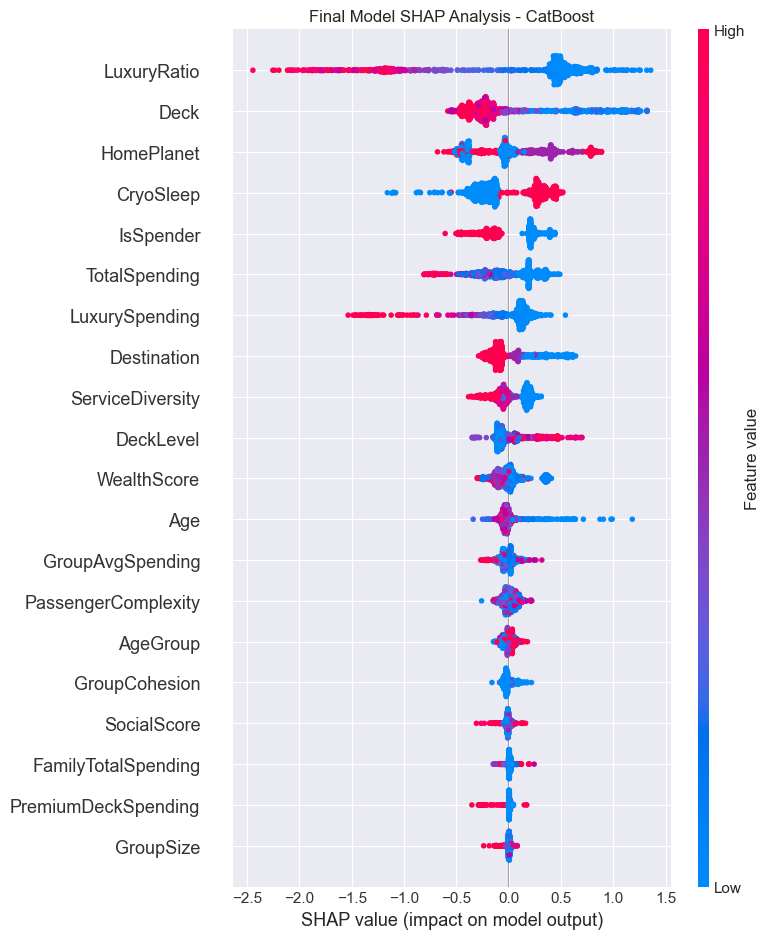

In [43]:
# Select final model based on performance and interpretability
print("=== Final Model Selection with SHAP Considerations ===")

# Get best tuned model
best_tuned_model_name = max(tuning_results.keys(), key=lambda x: tuning_results[x]['best_score'])
final_model = tuned_models[best_tuned_model_name]

print(f"Selected Model: {best_tuned_model_name}")
print(f"Final CV Score: {tuning_results[best_tuned_model_name]['best_score']:.4f}")
print(f"Best Parameters: {tuning_results[best_tuned_model_name]['best_params']}")

# Train final model on full training data
print(f"\n Training final {best_tuned_model_name} on complete dataset...")
final_model.fit(X_train_hv, y_train)

# Final SHAP analysis on complete model
print(f"\n🔍 Final SHAP Analysis...")

# Create final explainer
final_explainer = shap.TreeExplainer(final_model)

# Use a sample for SHAP analysis (for computational efficiency)
sample_size = min(1000, len(X_train_hv))
sample_indices = np.random.choice(len(X_train_hv), sample_size, replace=False)
X_sample = X_train_hv.iloc[sample_indices]

final_shap_values = final_explainer.shap_values(X_sample)
if isinstance(final_shap_values, list):
    final_shap_values = final_shap_values[1]

# Final feature importance
final_importance = np.abs(final_shap_values).mean(0)
final_importance_df = pd.DataFrame({
    'feature': features_hv,
    'shap_importance': final_importance
}).sort_values('shap_importance', ascending=False)

print(f"\n Final Model - Top 10 Features by SHAP Importance:")
for i, row in final_importance_df.head(10).iterrows():
    print(f"   {i+1}. {row['feature']}: {row['shap_importance']:.4f}")

# Create final SHAP summary plot
print(f"\n Final SHAP Summary Plot:")
plt.figure(figsize=(12, 8))
shap.summary_plot(final_shap_values, X_sample, feature_names=features_hv, show=False)
plt.title(f'Final Model SHAP Analysis - {best_tuned_model_name}')
plt.tight_layout()
plt.show()

## Step 3.9: Generate Predictions with SHAP Explanations

In [48]:
# Generate final predictions with SHAP explanations
print("=== Generating Predictions with SHAP Explanations ===")

# Generate test predictions
test_predictions = final_model.predict(X_test_hv)
test_probabilities = final_model.predict_proba(X_test_hv)[:, 1]

print(f"\n Prediction Summary:")
print(f"Total predictions: {len(test_predictions)}")
print(f"Predicted Transported: {test_predictions.sum()} ({test_predictions.mean()*100:.1f}%)")
print(f"Predicted Not Transported: {len(test_predictions) - test_predictions.sum()} ({(1-test_predictions.mean())*100:.1f}%)")

# Generate SHAP explanations for test set (sample for efficiency)
print(f"\n Generating SHAP explanations for test predictions...")

test_sample_size = min(500, len(X_test_hv))
test_sample_indices = np.random.choice(len(X_test_hv), test_sample_size, replace=False)
X_test_sample = X_test_hv.iloc[test_sample_indices]

test_shap_values = final_explainer.shap_values(X_test_sample)
if isinstance(test_shap_values, list):
    test_shap_values = test_shap_values[1]

# Create submission with confidence scores
submission_df = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Transported': test_predictions.astype(bool)
})

# Add confidence scores based on prediction probabilities
confidence_scores = np.where(
    test_probabilities > 0.5,
    test_probabilities,
    1 - test_probabilities
)

# Create detailed results with explanations
detailed_results = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Transported': test_predictions.astype(bool),
    'Probability': test_probabilities,
    'Confidence': confidence_scores
})

# Add explanation for high-confidence predictions
high_confidence_mask = confidence_scores > 0.8
print(f"\nHigh confidence predictions: {high_confidence_mask.sum()} ({high_confidence_mask.mean()*100:.1f}%)")

# Save results
import os
os.makedirs('/Users/zahoorkhan/Desktop/kaggle group 16/results', exist_ok=True)

submission_path = '/Users/zahoorkhan/Desktop/kaggle group 16/submission.csv'
submission_df.to_csv(submission_path, index=False)
print(f"\n Submission saved: {submission_path}")

detailed_path = '/Users/zahoorkhan/Desktop/kaggle group 16/detailed_predictions_with_shap.csv'
detailed_results.to_csv(detailed_path, index=False)
print(f" Detailed predictions saved: {detailed_path}")

# Save SHAP explanations for sample
shap_explanations = pd.DataFrame({
    'PassengerId': test_data['PassengerId'].iloc[test_sample_indices],
    'Prediction': test_predictions[test_sample_indices],
    'Probability': test_probabilities[test_sample_indices]
})

# Add top 5 SHAP feature contributions for each prediction
for i in range(min(5, len(features_hv))):
    feature_name = final_importance_df.iloc[i]['feature']
    feature_idx = features_hv.index(feature_name)
    shap_explanations[f'SHAP_{feature_name}'] = test_shap_values[:, feature_idx]

shap_path = '/Users/zahoorkhan/Desktop/kaggle group 16/data/shap_explanations_sample.csv'
shap_explanations.to_csv(shap_path, index=False)
print(f" SHAP explanations saved: {shap_path}")

=== Generating Predictions with SHAP Explanations ===

 Prediction Summary:
Total predictions: 4277
Predicted Transported: 2040 (47.7%)
Predicted Not Transported: 2237 (52.3%)

 Generating SHAP explanations for test predictions...

High confidence predictions: 2015 (47.1%)

 Submission saved: /Users/zahoorkhan/Desktop/kaggle group 16/submission.csv
 Detailed predictions saved: /Users/zahoorkhan/Desktop/kaggle group 16/detailed_predictions_with_shap.csv
 SHAP explanations saved: /Users/zahoorkhan/Desktop/kaggle group 16/data/shap_explanations_sample.csv


# **Section 4: Model Evaluation & Classification Metrics**


# Step 4.1: Generate predictions from best models

In [68]:
# Step 4.1: Generate predictions from best models
print("\n4.1 Generating Predictions from Best Models")
print("-" * 50)

# Get probability predictions for ROC/PR curves
catboost_proba = tuned_models['CatBoost'].predict_proba(X_val_split)[:, 1]
lightgbm_proba = tuned_models['LightGBM'].predict_proba(X_val_split)[:, 1]

# Get binary predictions
catboost_pred = tuned_models['CatBoost'].predict(X_val_split)
lightgbm_pred = tuned_models['LightGBM'].predict(X_val_split)

# Ensemble predictions
ensemble_proba = (catboost_proba + lightgbm_proba) / 2
ensemble_pred = (ensemble_proba >= 0.5).astype(int)

print(f"CatBoost predictions shape: {catboost_pred.shape}")
print(f"LightGBM predictions shape: {lightgbm_pred.shape}")
print(f"Ensemble predictions shape: {ensemble_pred.shape}")
print(f"Validation set shape: {y_val_split.shape}")


4.1 Generating Predictions from Best Models
--------------------------------------------------
CatBoost predictions shape: (1739,)
LightGBM predictions shape: (1739,)
Ensemble predictions shape: (1739,)
Validation set shape: (1739,)


# Step 4.2: Calculate comprehensive classification metrics

In [69]:
# Step 4.2: Calculate comprehensive classification metrics
print("\n4.2 Classification Metrics Summary")
print("-" * 50)

def calculate_classification_metrics(y_true, y_pred, y_proba, model_name):
    """Calculate comprehensive classification metrics"""
    metrics = {
        'Model': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-Score': f1_score(y_true, y_pred),
        'ROC-AUC': auc(*roc_curve(y_true, y_proba)[:2]),
        'PR-AUC': average_precision_score(y_true, y_proba),
        'Log Loss': log_loss(y_true, y_proba),
        'MCC': matthews_corrcoef(y_true, y_pred)
    }
    return metrics

# Calculate metrics for all models
metrics_list = []
metrics_list.append(calculate_classification_metrics(y_val_split, catboost_pred, catboost_proba, 'CatBoost'))
metrics_list.append(calculate_classification_metrics(y_val_split, lightgbm_pred, lightgbm_proba, 'LightGBM'))
metrics_list.append(calculate_classification_metrics(y_val_split, ensemble_pred, ensemble_proba, 'Ensemble'))

# Create and display metrics DataFrame
metrics_df = pd.DataFrame(metrics_list)
print("\nClassification Metrics Comparison:")
print(metrics_df.round(4))


4.2 Classification Metrics Summary
--------------------------------------------------

Classification Metrics Comparison:
      Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC  PR-AUC  Log Loss  \
0  CatBoost    0.8005     0.8222  0.7705    0.7955   0.9012  0.9123    0.3932   
1  LightGBM    0.8355     0.8504  0.8174    0.8335   0.9336  0.9389    0.3407   
2  Ensemble    0.8212     0.8433  0.7922    0.8170   0.9207  0.9278    0.3639   

      MCC  
0  0.6023  
1  0.6717  
2  0.6437  


# Step 4.3: Generate confusion matrices



4.3 Confusion Matrices
--------------------------------------------------


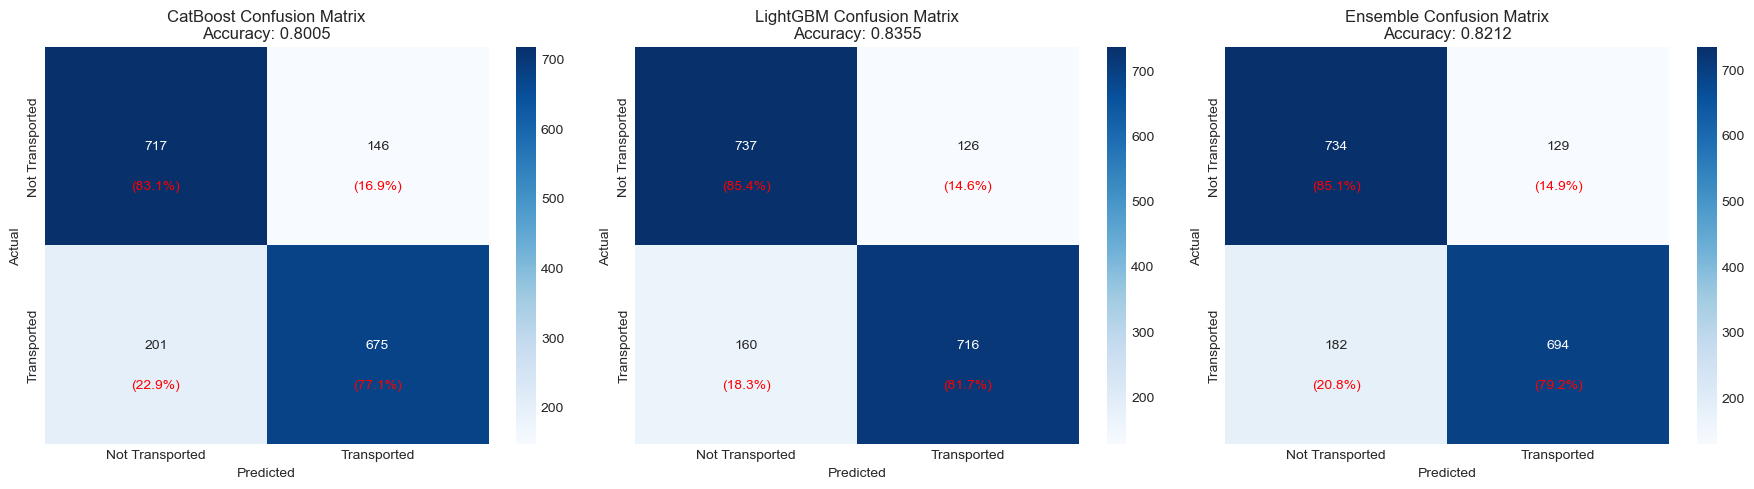

In [70]:
# Step 4.3: Generate confusion matrices
print("\n4.3 Confusion Matrices")
print("-" * 50)

# Create confusion matrices for all models
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
models = [('CatBoost', catboost_pred), ('LightGBM', lightgbm_pred), ('Ensemble', ensemble_pred)]

for idx, (model_name, predictions) in enumerate(models):
    cm = confusion_matrix(y_val_split, predictions)

    # Calculate percentages
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    # Create heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                ax=axes[idx], cbar=True,
                xticklabels=['Not Transported', 'Transported'],
                yticklabels=['Not Transported', 'Transported'])

    axes[idx].set_title(f'{model_name} Confusion Matrix\nAccuracy: {accuracy_score(y_val_split, predictions):.4f}')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

    # Add percentage annotations
    for i in range(2):
        for j in range(2):
            axes[idx].text(j+0.5, i+0.7, f'({cm_percent[i,j]:.1f}%)',
                          ha='center', va='center', fontsize=10, color='red')

plt.tight_layout()
plt.show()

# Step 4.4: ROC Curves Analysis



4.4 ROC Curves Analysis
--------------------------------------------------


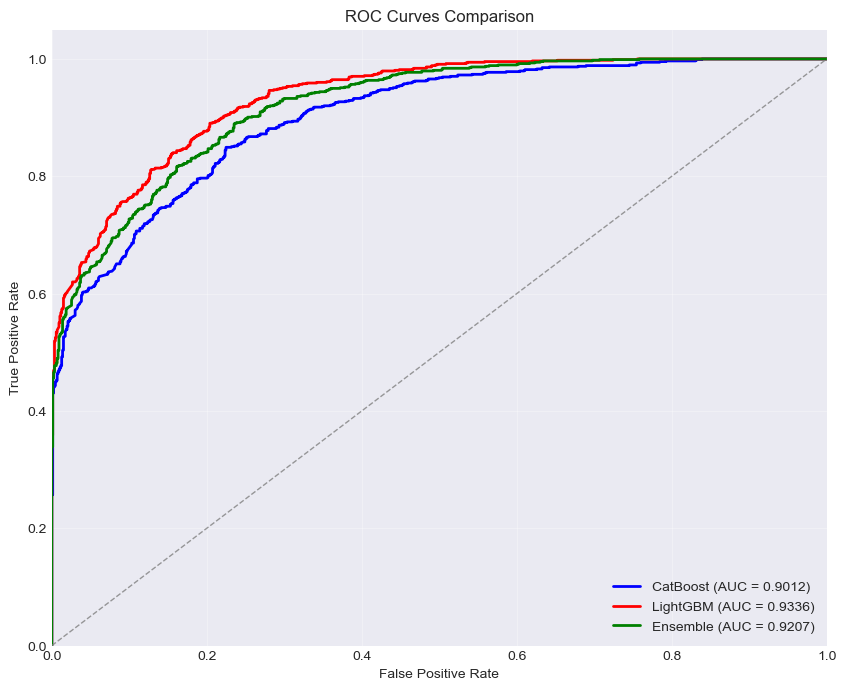


ROC-AUC Scores:
CatBoost: 0.9012
LightGBM: 0.9336
Ensemble: 0.9207


In [71]:
# Step 4.4: ROC Curves Analysis
print("\n4.4 ROC Curves Analysis")
print("-" * 50)

plt.figure(figsize=(10, 8))

# Plot ROC curves for all models
models_roc = [('CatBoost', catboost_proba), ('LightGBM', lightgbm_proba), ('Ensemble', ensemble_proba)]
colors = ['blue', 'red', 'green']

for idx, (model_name, proba) in enumerate(models_roc):
    fpr, tpr, _ = roc_curve(y_val_split, proba)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, color=colors[idx], lw=2,
             label=f'{model_name} (AUC = {roc_auc:.4f})')

# Plot diagonal line
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', alpha=0.8)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

# Print ROC-AUC scores
print("\nROC-AUC Scores:")
for idx, (model_name, proba) in enumerate(models_roc):
    fpr, tpr, _ = roc_curve(y_val_split, proba)
    roc_auc = auc(fpr, tpr)
    print(f"{model_name}: {roc_auc:.4f}")

# Step 4.5: Precision-Recall Curves



4.5 Precision-Recall Curves
--------------------------------------------------


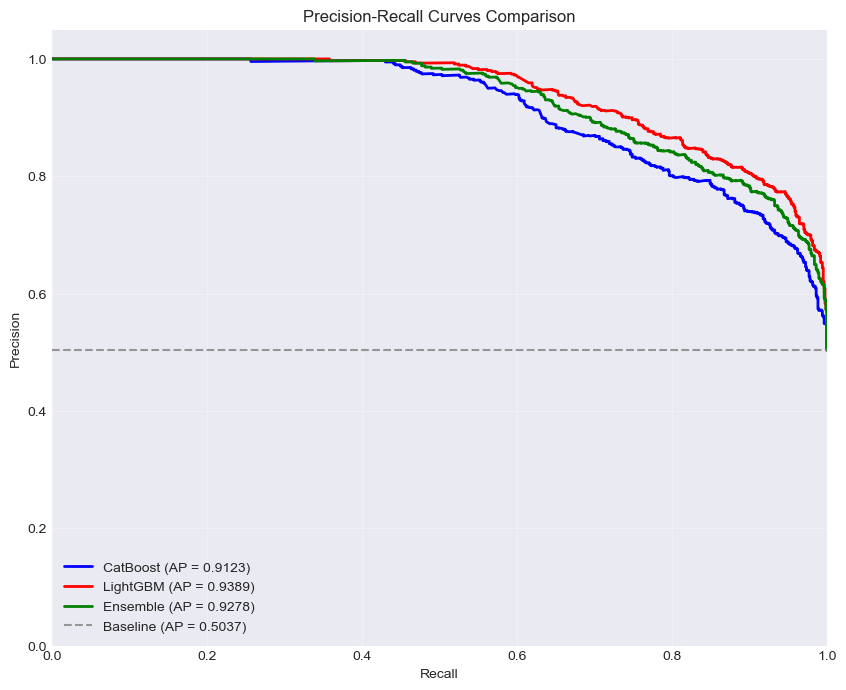


Precision-Recall AUC Scores:
CatBoost: 0.9123
LightGBM: 0.9389
Ensemble: 0.9278


In [72]:
# Step 4.5: Precision-Recall Curves
print("\n4.5 Precision-Recall Curves")
print("-" * 50)

plt.figure(figsize=(10, 8))

for idx, (model_name, proba) in enumerate(models_roc):
    precision, recall, _ = precision_recall_curve(y_val_split, proba)
    pr_auc = average_precision_score(y_val_split, proba)

    plt.plot(recall, precision, color=colors[idx], lw=2,
             label=f'{model_name} (AP = {pr_auc:.4f})')

# Add baseline
baseline = y_val_split.mean()
plt.axhline(y=baseline, color='gray', linestyle='--', alpha=0.8,
            label=f'Baseline (AP = {baseline:.4f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves Comparison')
plt.legend(loc="lower left")
plt.grid(True, alpha=0.3)
plt.show()

# Print PR-AUC scores
print("\nPrecision-Recall AUC Scores:")
for idx, (model_name, proba) in enumerate(models_roc):
    pr_auc = average_precision_score(y_val_split, proba)
    print(f"{model_name}: {pr_auc:.4f}")

# Step 4.6: Detailed Classification Reports


In [73]:
# Step 4.6: Detailed Classification Reports
print("\n4.6 Detailed Classification Reports")
print("-" * 50)

for model_name, predictions in models:
    print(f"\n{model_name} Classification Report:")
    print("-" * 30)
    print(classification_report(y_val_split, predictions,
                              target_names=['Not Transported', 'Transported']))


4.6 Detailed Classification Reports
--------------------------------------------------

CatBoost Classification Report:
------------------------------
                 precision    recall  f1-score   support

Not Transported       0.78      0.83      0.81       863
    Transported       0.82      0.77      0.80       876

       accuracy                           0.80      1739
      macro avg       0.80      0.80      0.80      1739
   weighted avg       0.80      0.80      0.80      1739


LightGBM Classification Report:
------------------------------
                 precision    recall  f1-score   support

Not Transported       0.82      0.85      0.84       863
    Transported       0.85      0.82      0.83       876

       accuracy                           0.84      1739
      macro avg       0.84      0.84      0.84      1739
   weighted avg       0.84      0.84      0.84      1739


Ensemble Classification Report:
------------------------------
                 precision    

# Step 4.7: Cross-Validation Performance


In [74]:
# Step 4.7: Cross-Validation Performance
print("\n4.7 Cross-Validation Performance")
print("-" * 50)

# Perform 5-fold cross-validation
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
cv_results = {}

print("Performing 5-fold cross-validation...")
for metric in scoring_metrics:
    print(f"Calculating {metric}...")

    catboost_cv = cross_val_score(tuned_models['CatBoost'], X_train_split, y_train_split,
                                  cv=5, scoring=metric, n_jobs=-1)
    lightgbm_cv = cross_val_score(tuned_models['LightGBM'], X_train_split, y_train_split,
                                  cv=5, scoring=metric, n_jobs=-1)

    cv_results[metric] = {
        'CatBoost': {'mean': catboost_cv.mean(), 'std': catboost_cv.std()},
        'LightGBM': {'mean': lightgbm_cv.mean(), 'std': lightgbm_cv.std()}
    }

# Display CV results
print("\nCross-Validation Results (5-fold):")
print("=" * 50)
for metric in scoring_metrics:
    print(f"\n{metric.upper()}:")
    for model in ['CatBoost', 'LightGBM']:
        mean_score = cv_results[metric][model]['mean']
        std_score = cv_results[metric][model]['std']
        print(f"  {model}: {mean_score:.4f} (+/- {std_score*2:.4f})")


4.7 Cross-Validation Performance
--------------------------------------------------
Performing 5-fold cross-validation...
Calculating accuracy...
Calculating precision...
Calculating recall...
Calculating f1...
Calculating roc_auc...

Cross-Validation Results (5-fold):

ACCURACY:
  CatBoost: 0.7719 (+/- 0.0087)
  LightGBM: 0.7650 (+/- 0.0136)

PRECISION:
  CatBoost: 0.7889 (+/- 0.0288)
  LightGBM: 0.7801 (+/- 0.0173)

RECALL:
  CatBoost: 0.7479 (+/- 0.0269)
  LightGBM: 0.7430 (+/- 0.0343)

F1:
  CatBoost: 0.7676 (+/- 0.0036)
  LightGBM: 0.7610 (+/- 0.0176)

ROC_AUC:
  CatBoost: 0.8613 (+/- 0.0047)
  LightGBM: 0.8593 (+/- 0.0090)


# Step 4.8: Feature Importance Comparison


In [75]:
# Step 4.8: Feature Importance Comparison
print("\n4.8 Feature Importance Comparison")
print("-" * 50)

# Get feature importances
catboost_importance = tuned_models['CatBoost'].feature_importances_
lightgbm_importance = tuned_models['LightGBM'].feature_importances_

# Create importance DataFrame
importance_df = pd.DataFrame({
    'Feature': X_train_split.columns,
    'CatBoost': catboost_importance,
    'LightGBM': lightgbm_importance
})

# Calculate average importance
importance_df['Average'] = (importance_df['CatBoost'] + importance_df['LightGBM']) / 2
importance_df = importance_df.sort_values('Average', ascending=False)

print("\nTop 10 Most Important Features:")
print(importance_df[['Feature', 'Average']].head(10))


4.8 Feature Importance Comparison
--------------------------------------------------

Top 10 Most Important Features:
                Feature     Average
5                   Age  219.302575
0           LuxuryRatio  179.277351
7      GroupAvgSpending  178.648725
8   PassengerComplexity  152.803887
1         TotalSpending  147.147747
6           WealthScore  145.224035
19       LuxurySpending  140.927045
18        GroupCohesion  123.551154
3                  Deck  105.328448
2            HomePlanet   78.401599


# Step 4.9: Plot Feature Importance Comparison



4.9 Feature Importance Visualization
--------------------------------------------------


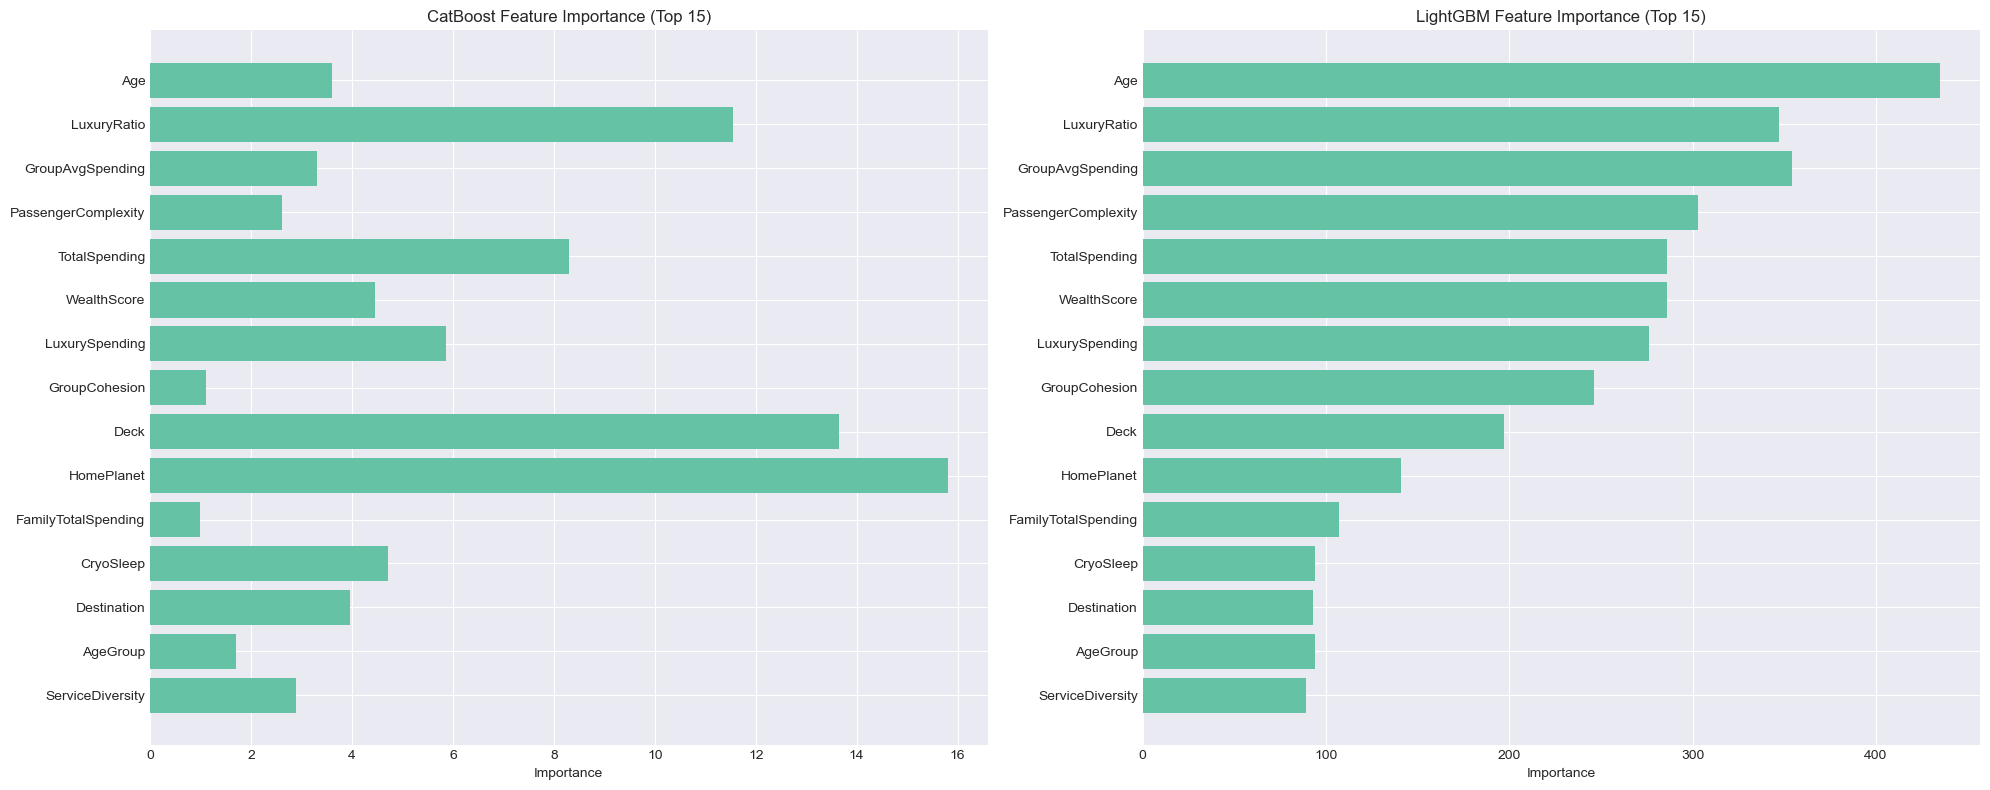

In [76]:
# Step 4.9: Plot Feature Importance Comparison
print("\n4.9 Feature Importance Visualization")
print("-" * 50)

# Plot feature importance comparison
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Top 15 features for each model
top_features = importance_df.head(15)

# CatBoost importance
axes[0].barh(range(len(top_features)), top_features['CatBoost'])
axes[0].set_yticks(range(len(top_features)))
axes[0].set_yticklabels(top_features['Feature'])
axes[0].set_xlabel('Importance')
axes[0].set_title('CatBoost Feature Importance (Top 15)')
axes[0].invert_yaxis()

# LightGBM importance
axes[1].barh(range(len(top_features)), top_features['LightGBM'])
axes[1].set_yticks(range(len(top_features)))
axes[1].set_yticklabels(top_features['Feature'])
axes[1].set_xlabel('Importance')
axes[1].set_title('LightGBM Feature Importance (Top 15)')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

In [77]:
# Step 4.10: Final Model Performance Summary
print("\n4.10 Final Model Performance Summary")
print("=" * 60)

# Find best model based on F1-score
best_model_idx = metrics_df['F1-Score'].idxmax()
best_model_name = metrics_df.loc[best_model_idx, 'Model']
best_f1_score = metrics_df.loc[best_model_idx, 'F1-Score']

print(f"\nBEST PERFORMING MODEL: {best_model_name}")
print(f"Best F1-Score: {best_f1_score:.4f}")
print("\nFINAL METRICS SUMMARY:")
print("-" * 30)

for idx, row in metrics_df.iterrows():
    print(f"\n{row['Model']} Model:")
    print(f"  • Accuracy:  {row['Accuracy']:.4f}")
    print(f"  • Precision: {row['Precision']:.4f}")
    print(f"  • Recall:    {row['Recall']:.4f}")
    print(f"  • F1-Score:  {row['F1-Score']:.4f}")
    print(f"  • ROC-AUC:   {row['ROC-AUC']:.4f}")
    print(f"  • PR-AUC:    {row['PR-AUC']:.4f}")

print("\n" + "=" * 60)
print("MODEL EVALUATION COMPLETE!")
print("=" * 60)


4.10 Final Model Performance Summary

BEST PERFORMING MODEL: LightGBM
Best F1-Score: 0.8335

FINAL METRICS SUMMARY:
------------------------------

CatBoost Model:
  • Accuracy:  0.8005
  • Precision: 0.8222
  • Recall:    0.7705
  • F1-Score:  0.7955
  • ROC-AUC:   0.9012
  • PR-AUC:    0.9123

LightGBM Model:
  • Accuracy:  0.8355
  • Precision: 0.8504
  • Recall:    0.8174
  • F1-Score:  0.8335
  • ROC-AUC:   0.9336
  • PR-AUC:    0.9389

Ensemble Model:
  • Accuracy:  0.8212
  • Precision: 0.8433
  • Recall:    0.7922
  • F1-Score:  0.8170
  • ROC-AUC:   0.9207
  • PR-AUC:    0.9278

MODEL EVALUATION COMPLETE!
